# Exploration du fichier source 'title.basics.tsv'

## Étape 1 : Préparation et Importation des Données

In [1]:
# 1. Importer les bibliothèques nécessaires 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 2. Charger le fichier TSV

df_title_basics = pd.read_csv("../gitignore/title.basics.tsv",sep='\t')

C:\Users\jpvt\AppData\Local\Temp\ipykernel_12424\830202319.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_title_basics = pd.read_csv("../gitignore/title.basics.tsv",sep='\t')


In [4]:
df_title_basics_copy = df_title_basics.copy()

In [5]:
# 3. Aperçu initial des données :

print(df_title_basics.info())  # Donne des informations sur les types de colonnes et les valeurs manquantes
print(df_title_basics.describe())  # Statistiques descriptives basiques (numériques uniquement)

print("Aperçu des premières lignes :")
print(df_title_basics.head())

print("Aperçu des dernières lignes :")
print(df_title_basics.tail())

print("Aperçu de lignes au hasard :")
print(df_title_basics.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11248099 entries, 0 to 11248098
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 772.3+ MB
None
           tconst  titleType  primaryTitle originalTitle   isAdult startYear  \
count    11248099   11248099      11248080      11248080  11248099  11248099   
unique   11248099         11       5048924       5073560        44       152   
top     tt0000001  tvEpisode  Episode #1.1  Episode #1.1         0        \N   
freq            1    8640119         53438         53438  10822407   1417048   

         endYear runtimeMinutes    genres  
count   11248099       11248099  11247466  
unique        98            944      2384 

## Étape 2 : Inspection des Données

In [6]:
# 1. Vérification des dimensions :

print(df_title_basics.shape)  # Nombre de lignes et de colonnes

(11248099, 9)


Valeurs manquantes par colonne :
tconst              0
titleType           0
primaryTitle       19
originalTitle      19
isAdult             0
startYear           0
endYear             0
runtimeMinutes      0
genres            633
dtype: int64


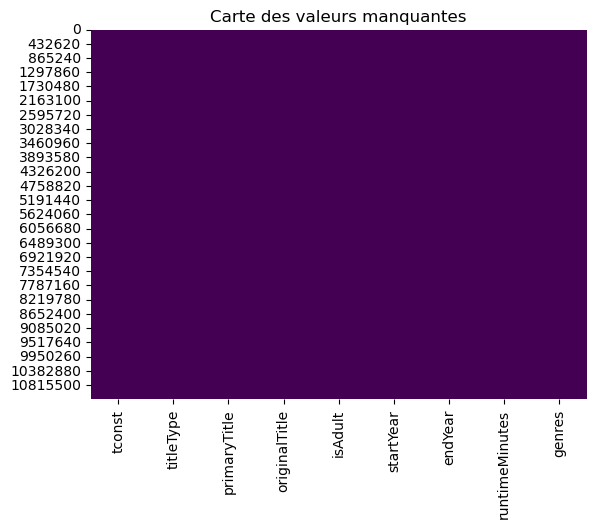

In [7]:
# 2. Identifier les valeurs manquantes

missing_values = df_title_basics.isnull().sum()
print("Valeurs manquantes par colonne :")
print(missing_values)

# Visualisation des valeurs manquantes : NE FONCTIONNE PAS A MODIFIER
sns.heatmap(df_title_basics.isnull(), cbar=False, cmap='viridis')
plt.title("Carte des valeurs manquantes")
plt.show()


In [8]:
# 3. Identification des doublons :

print(df_title_basics.duplicated().sum())  # Nombre de lignes dupliquées

0


In [9]:
# 4. Vérifier les types de données et informations globales

print(df_title_basics.info())  # Types de données, valeurs non nulles
print(df_title_basics.describe(include='all'))  # Statistiques générales pour toutes les colonnes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11248099 entries, 0 to 11248098
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 772.3+ MB
None
           tconst  titleType  primaryTitle originalTitle   isAdult startYear  \
count    11248099   11248099      11248080      11248080  11248099  11248099   
unique   11248099         11       5048924       5073560        44       152   
top     tt0000001  tvEpisode  Episode #1.1  Episode #1.1         0        \N   
freq            1    8640119         53438         53438  10822407   1417048   

         endYear runtimeMinutes    genres  
count   11248099       11248099  11247466  
unique        98            944      2384 

In [10]:
# regarder combien de lignes ont une donnée abérante dans 'isAdult' ? 
df_title_basics["isAdult"].unique()
df_title_basics["isAdult"].value_counts()

isAdult
0       10822407
1         359524
0          63526
1           2009
1985          79
1980          63
1978          54
1984          41
1974          32
1982          32
1972          29
2015          28
1983          25
2016          21
1977          20
1976          18
1975          18
1973          18
1981          18
1986          17
2017          17
1987          13
1979          13
2020           9
2018           9
2013           8
2019           7
2023           7
2014           6
1966           5
1988           5
2024           4
1968           3
2022           2
1970           2
1971           2
1969           1
1967           1
1964           1
\N             1
2012           1
2021           1
2011           1
2005           1
Name: count, dtype: int64

### Actions à mener sur les formats de colonnes

| #   | Column     | Dtype | Conclusion                                     |
| --- | ---------- | ----- | ---------------------------------------------- |
| 0  | tconst         | object |--> censé être un string, donc ok pour le format|
| 1  | titleType      | object |--> censé être un string, donc ok pour le format. Semble être des catégories, donc nombre limité de chaines de caractères différentes.|
| 2  | primaryTitle   | object |--> censé être un string, donc ok pour le format|
| 3  | originalTitle  | object |--> censé être un string, donc ok pour le format|
| 4  | isAdult        | object |--> censé être un booléen (0 ou 1), donc MAUVAIS FORMAT|
| 5  | startYear      | object |--> censé être une date (datetime), donc MAUVAIS FORMAT --> NON plutôt INTEGER|
| 6  | endYear        | object |--> censé être une date (datetime), donc MAUVAIS FORMAT --> NON plutôt INTEGER|
| 7  | runtimeMinutes | object |--> censé être un integer, donc MAUVAIS FORMAT|
| 8  | genres         | object |--> contient une chaine caractères (string) qui représente une succession d'éléments séparés par des virgules. MAUVAIS FRMAT POUR UN EXPLODE, bon format pour un SPLIT|

In [11]:
df_title_basics[df_title_basics['tconst']=='tt2457282']

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
6091493,tt2457282,movie,Puella Magi Madoka Magica the Movie Part III: ...,Gekijouban Mahou shojo Madoka magika Shinpen: ...,0,2013,\N,116,"Animation,Drama,Fantasy"


In [12]:
# 5. Reformatage des colonnes au type (format) incorrect :

# Étape 1 : Conversion des colonnes numériques avec remplacement des Nan par 0 (il faudra surement supprimer les lignes correspondantes)

df_title_basics_copy[['startYear', 'endYear', 'runtimeMinutes']] = df_title_basics_copy[
    ['startYear', 'endYear', 'runtimeMinutes']
].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)


# Étape 2 : Nettoyage de la colonne isAdult

# Convertir toutes les valeurs de isAdult en numériques, en remplaçant les valeurs invalides par NaN
df_title_basics_copy['isAdult'] = pd.to_numeric(df_title_basics_copy['isAdult'], errors='coerce')

# Supprimer les lignes où isAdult contient des années ou des valeurs non valides
df_title_basics_copy = df_title_basics_copy[df_title_basics_copy['isAdult'].isin([0, 1])]


# Étape 3 : Conversion en booléen
df_title_basics_copy['isAdult'] = df_title_basics_copy['isAdult'].astype('boolean')


In [13]:
# regarder combien de lignes ont une donnée abérante dans 'isAdult' ? 
print("Avant reformatage et nettoyage : ")
print(df_title_basics["isAdult"].unique())
print(df_title_basics["isAdult"].value_counts())

print("Après reformatage et nettoyage : ")
print(df_title_basics_copy["isAdult"].unique())
print(df_title_basics_copy["isAdult"].value_counts())

Avant reformatage et nettoyage : 
[0 1 2019 1981 2020 2017 '0' '1' '\\N' 2023 2022 2011 2016 2015 2014 2013
 2012 2018 2021 1979 1980 1982 1983 1984 1987 1985 1986 1977 1978 1966
 1970 1971 1972 1973 1974 1975 1988 1976 1968 1969 1964 1967 2024 2005]
isAdult
0       10822407
1         359524
0          63526
1           2009
1985          79
1980          63
1978          54
1984          41
1974          32
1982          32
1972          29
2015          28
1983          25
2016          21
1977          20
1976          18
1975          18
1973          18
1981          18
1986          17
2017          17
1987          13
1979          13
2020           9
2018           9
2013           8
2019           7
2023           7
2014           6
1966           5
1988           5
2024           4
1968           3
2022           2
1970           2
1971           2
1969           1
1967           1
1964           1
\N             1
2012           1
2021           1
2011           1
2005      

## Étape 3 : Analyse des Variables

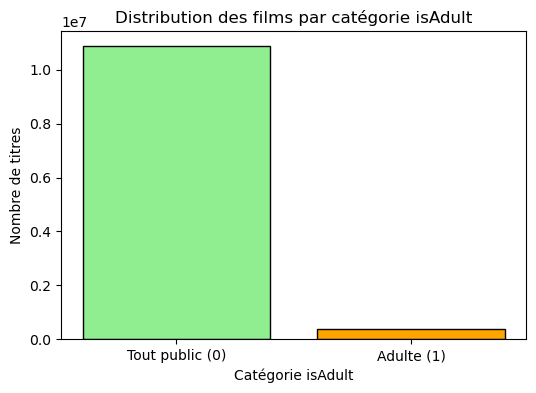

Proportions des catégories isAdult (%):
isAdult
False    96.785649
True      3.214351
Name: count, dtype: Float64


In [14]:
# 6. Étudier la distribution des colonnes

# Analyse et visualisation de isAdult
is_adult_counts = df_title_basics_copy['isAdult'].value_counts()

# Graphique en barres pour isAdult
plt.figure(figsize=(6, 4))
plt.bar(is_adult_counts.index, is_adult_counts.values, color=['lightgreen', 'orange'], edgecolor='black')
plt.xticks([0, 1], labels=['Tout public (0)', 'Adulte (1)'])
plt.xlabel('Catégorie isAdult')
plt.ylabel('Nombre de titres')
plt.title('Distribution des films par catégorie isAdult')
plt.show()

# Afficher les proportions
proportions = is_adult_counts / is_adult_counts.sum() * 100
print("Proportions des catégories isAdult (%):")
print(proportions)



In [15]:
# 7. Vérifier la présence de doublons (NE MARCHE PAS AVEC LE FORMAT LISTE SUR LE GENRE, ça marche en utilisant le df avant reformatage de la colonne Genre)

duplicated_rows = df_title_basics[df_title_basics.duplicated()]
print(f"Nombre de doublons : {len(duplicated_rows)}")

Nombre de doublons : 0


In [16]:
# 8. Explorer les relations entre les colonnes (PAS UTILE SUR CE DATASET, car pas de données numériques, seulement dates et catégories)

# Corrélation entre variables numériques :

# correlation_matrix = df_title_basics_copy.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title("Matrice de corrélation")
# plt.show()

# Relations entre variables :

# sns.pairplot(df_title_basics_copy.select_dtypes(include=[np.number]))
# plt.show()

In [17]:
# 9. Étudier les valeurs aberrantes (PAS UTILE SUR CE DATASET, car pas de données numériques, seulement dates et catégories)

# for col in df_title_basics.df_title_basics_copy(include=[np.number]).columns:
#    sns.boxplot(x=df_title_basics_copy[col])
#    plt.title(f"Boîte à moustaches pour {col}")
#    plt.show()

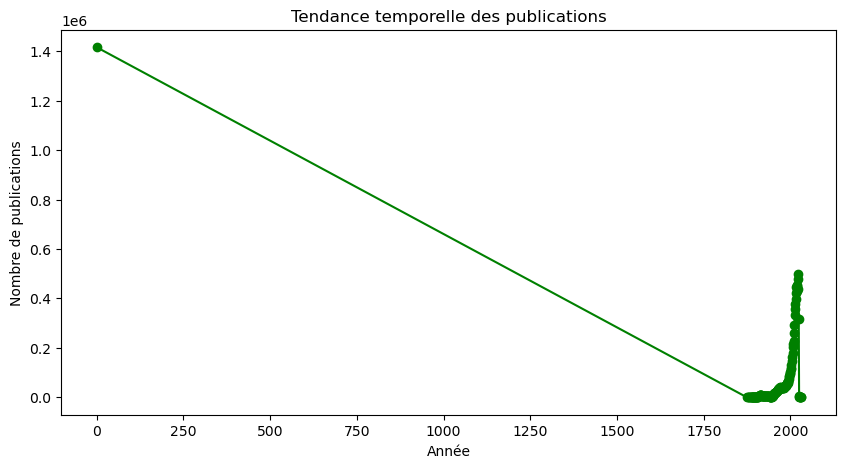

In [18]:
# 10. Explorer la distribution temporelle

# Analyse des séries temporelles

# Grouper par année et calculer le nombre d'occurrences
yearly_counts = df_title_basics_copy.groupby('startYear').size()

# Visualisation
yearly_counts.plot(kind='line', figsize=(10, 5), marker='o', color='green')
plt.title("Tendance temporelle des publications")
plt.xlabel("Année")
plt.ylabel("Nombre de publications")
plt.show()


    decade  film_count
0        0     1416415
1     1870          32
2     1880          79
3     1890        6080
4     1900       25762
5     1910       72552
6     1920       36950
7     1930       32655
8     1940       29349
9     1950      159490
10    1960      311617
11    1970      388484
12    1980      456860
13    1990      737310
14    2000     1606215
15    2010     3794551
16    2020     2173053
17    2030          12


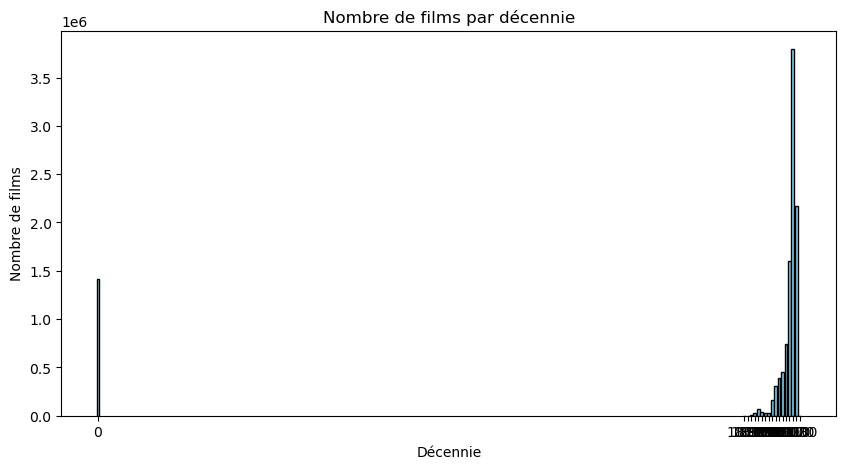

In [19]:
# Décennie = année - (année % 10)
df_title_basics_copy['decade'] = (df_title_basics_copy['startYear'] // 10) * 10

# Compter le nombre de films par décennie
films_per_decade = df_title_basics_copy.groupby('decade').size().reset_index(name='film_count')

# Afficher les résultats
print(films_per_decade)

# Visualiser
plt.figure(figsize=(10, 5))
plt.bar(films_per_decade['decade'], films_per_decade['film_count'], width=8, color='skyblue', edgecolor='black')
plt.xlabel('Décennie')
plt.ylabel('Nombre de films')
plt.title('Nombre de films par décennie')
plt.xticks(films_per_decade['decade'])
plt.show()

## Etape 4 : Sélection des données désirées

In [20]:
# Suppression des films pour adultes de la colonne 'isAdult': 

df_title_basics_copy = df_title_basics_copy[df_title_basics_copy['isAdult'] == False]

In [21]:
# Transformer la colonne titleType en plusieurs colonnes : 

# Avoir la liste de toutes les valeurs possibles pour le 'genres'
liste_genres = ['Action', 'Adult', 'Adventure',
                 'Animation', 'Biography', 'Comedy',
                   'Crime', 'Documentary', 'Drama', 'Family',
                     'Fantasy', 'Game-Show', 'History',
                       'Horror', 'Music', 'Musical', 'Mystery',
                         'News', 'Reality-TV', 'Romance', 'Sci-Fi',
                           'Short', 'Sport', 'Talk-Show', 'Thriller',
                             'War', 'Western', '\\N']

# Parcourir la liste des genres
for genre in liste_genres :
    # Créer une nouvelle colonne pour chaque genre
    df_title_basics_copy[genre] = df_title_basics_copy['genres'].str.contains(genre, na=False, regex=False)

# Afficher un échantillon des données
print(df_title_basics_copy.sample(5))


             tconst  titleType                   primaryTitle  \
5709237   tt2226879  tvEpisode   Episode dated 26 August 2005   
325131    tt0339549      movie            Queen of the Wicked   
2284276  tt12382100  tvEpisode                  Episode #5.68   
7296212  tt30387403  tvEpisode  Escapism: Our Brave New World   
3296875  tt14269930  tvEpisode                           2016   

                         originalTitle  isAdult  startYear  endYear  \
5709237   Episode dated 26 August 2005    False       2005        0   
325131             Queen of the Wicked    False       1916        0   
2284276                  Episode #5.68    False          0        0   
7296212  Escapism: Our Brave New World    False       2017        0   
3296875                           2016    False       2021        0   

         runtimeMinutes                   genres  decade  ...  Reality-TV  \
5709237               0                Game-Show    2000  ...       False   
325131                0     

In [22]:
# Vérification du nombre d'élément par valeur : 

liste_genres = ['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western']
for i in liste_genres :
    print (df_title_basics_copy[i].value_counts())

Action
False    10422402
True       463531
Name: count, dtype: int64
Adult
False    10885906
True           27
Name: count, dtype: int64
Adventure
False    10460746
True       425187
Name: count, dtype: int64
Animation
False    10327857
True       558076
Name: count, dtype: int64
Biography
False    10765735
True       120198
Name: count, dtype: int64
Comedy
False    8694004
True     2191929
Name: count, dtype: int64
Crime
False    10424129
True       461804
Name: count, dtype: int64
Documentary
False    9819795
True     1066138
Name: count, dtype: int64
Drama
False    7717909
True     3168024
Name: count, dtype: int64
Family
False    10061278
True       824655
Name: count, dtype: int64
Fantasy
False    10652442
True       233491
Name: count, dtype: int64
Game-Show
False    10458217
True       427716
Name: count, dtype: int64
History
False    10719843
True       166090
Name: count, dtype: int64
Horror
False    10682793
True       203140
Name: count, dtype: int64
Music
False    10389325


--> il reste 27 films True dans la colonne 'Adult', ils n'avaient pas l'attribut 'IsAdult' = True (et donc qui n'avaient pas pu être supprimés)

In [23]:
# Suppression des données non désirées dans la colonne 'Adult' (issu de la colonne 'genre' précédemment séparé en colonnes le genre du film): 

df_title_basics_copy = df_title_basics_copy[df_title_basics_copy['Adult'] == False] # On ne garde que les lignes où 'Adult' est False. 

In [24]:
# Vérification si on a bien supprimé les Adult restants : 

df_title_basics_copy['Adult'].value_counts()

Adult
False    10885906
Name: count, dtype: int64

In [25]:
# Combien d'éléments par 'titleType' : 

df_title_basics_copy['titleType'].value_counts()

titleType
tvEpisode       8400536
short           1026210
movie            688341
tvSeries         270117
video            193543
tvMovie          148803
tvMiniSeries      57591
tvSpecial         50232
videoGame         40065
tvShort           10467
tvPilot               1
Name: count, dtype: int64

In [26]:
# Conserver uniquement 'titleType'  = movie ou = short 

df_title_basics_copy = df_title_basics_copy[df_title_basics_copy['titleType'] == 'movie']


# Apliquer le get_gummies sur la colonne 'titleType' :

df_dummies = pd.get_dummies(df_title_basics_copy['titleType'])
df_title_basics_copy = pd.concat([df_title_basics_copy, df_dummies],
          axis = 1)

In [27]:
# Supprimer les colonnes : 

df_title_basics_copy = df_title_basics_copy.drop(['endYear','\\N','isAdult','primaryTitle','originalTitle'],axis=1)

# Voir le résultat : 

df_title_basics_copy.sample(10)

,tconst,titleType,startYear,runtimeMinutes,genres,decade,Action,Adult,Adventure,Animation,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,movie
5323283,tt2101352,movie,2011,90,"Documentary,Drama",2010,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4352519,tt1632656,movie,2007,61,Documentary,2000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6492749,tt27369477,movie,2023,0,Documentary,2020,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
107664,tt0110166,movie,1994,55,Documentary,1990,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
16583,tt0016840,movie,1926,60,"Comedy,Drama",1920,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
438386,tt0456737,movie,1921,0,Drama,1920,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5744734,tt2246599,movie,2012,95,"Drama,Romance",2010,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
11165267,tt9737940,movie,2018,48,Drama,2010,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7235865,tt3014696,movie,1990,0,Drama,1990,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
92147,tt0094248,movie,1986,88,Drama,1980,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [28]:
# Combien d'éléments par valeur de 'startYear' : 

df_title_basics_copy['startYear'].value_counts()

startYear
0       101266
2022     20442
2023     20021
2018     19179
2019     19075
         ...  
2030         1
1894         1
1896         1
2028         1
2031         1
Name: count, Length: 138, dtype: int64

In [29]:
# Combien d'éléments par valeur de 'runtimeMinutes' : 

display(df_title_basics_copy['runtimeMinutes'].value_counts())


runtimeMinutes
0        255171
90        28222
80        12219
60        12146
85        11756
          ...  
28643         1
1325          1
384           1
570           1
990           1
Name: count, Length: 517, dtype: int64

In [30]:
# Combien d'éléments par valeur de 'runtimeMinutes' = 0 ET titleType = 'movie': 

display(df_title_basics_copy[((df_title_basics_copy['startYear']==0) & (df_title_basics_copy['titleType']=='movie')) | ((df_title_basics_copy['runtimeMinutes']==0) & (df_title_basics_copy['titleType']=='movie'))])

,tconst,titleType,startYear,runtimeMinutes,genres,decade,Action,Adult,Adventure,Animation,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,movie
610,tt0000615,movie,1907,0,Drama,1900,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
625,tt0000630,movie,1908,0,Drama,1900,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
668,tt0000675,movie,1908,0,Drama,1900,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
828,tt0000838,movie,1909,0,\N,1900,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
832,tt0000842,movie,1909,0,\N,1900,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11247776,tt9916178,movie,0,0,\N,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11247780,tt9916188,movie,0,0,Thriller,0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
11247897,tt9916428,movie,2019,0,"Adventure,History,War",2010,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True
11247989,tt9916620,movie,0,0,Drama,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [31]:
# Combien d'éléments par valeur de 'runtimeMinutes' = 0 ET titleType = 'movie': 

display(df_title_basics_copy[(df_title_basics_copy['runtimeMinutes']==0) & (df_title_basics_copy['titleType']=='movie')])

,tconst,titleType,startYear,runtimeMinutes,genres,decade,Action,Adult,Adventure,Animation,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,movie
610,tt0000615,movie,1907,0,Drama,1900,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
625,tt0000630,movie,1908,0,Drama,1900,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
668,tt0000675,movie,1908,0,Drama,1900,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
828,tt0000838,movie,1909,0,\N,1900,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
832,tt0000842,movie,1909,0,\N,1900,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11247776,tt9916178,movie,0,0,\N,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11247780,tt9916188,movie,0,0,Thriller,0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
11247897,tt9916428,movie,2019,0,"Adventure,History,War",2010,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True
11247989,tt9916620,movie,0,0,Drama,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [32]:
df_title_basics_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 688341 entries, 8 to 11248049
Data columns (total 34 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          688341 non-null  object
 1   titleType       688341 non-null  object
 2   startYear       688341 non-null  int32 
 3   runtimeMinutes  688341 non-null  int32 
 4   genres          688341 non-null  object
 5   decade          688341 non-null  int32 
 6   Action          688341 non-null  bool  
 7   Adult           688341 non-null  bool  
 8   Adventure       688341 non-null  bool  
 9   Animation       688341 non-null  bool  
 10  Biography       688341 non-null  bool  
 11  Comedy          688341 non-null  bool  
 12  Crime           688341 non-null  bool  
 13  Documentary     688341 non-null  bool  
 14  Drama           688341 non-null  bool  
 15  Family          688341 non-null  bool  
 16  Fantasy         688341 non-null  bool  
 17  Game-Show       688341 non-null 

In [33]:
# Exporter en CSV

df_title_basics_copy.to_csv('../gitignore/title_basics_traite.csv', index=False, encoding='utf-8')